In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)
nf()
import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

# import autotime
# %load_ext autoreload
# %autoreload 2
# %load_ext autotime

# For dark themes 
from jupyterthemes import jtplot
jtplot.style()

# Para quando tiver atualização de submodulos
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("data/UCI_Credit_Card.csv")

In [3]:
df.shape

(30000, 25)

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [6]:
df.pay_5.unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6])

In [7]:
f()
df.dtypes
nf()

id                              int64
limit_bal                     float64
sex                             int64
education                       int64
marriage                        int64
age                             int64
pay_0                           int64
pay_2                           int64
pay_3                           int64
pay_4                           int64
pay_5                           int64
pay_6                           int64
bill_amt1                     float64
bill_amt2                     float64
bill_amt3                     float64
bill_amt4                     float64
bill_amt5                     float64
bill_amt6                     float64
pay_amt1                      float64
pay_amt2                      float64
pay_amt3                      float64
pay_amt4                      float64
pay_amt5                      float64
pay_amt6                      float64
default.payment.next.month      int64
dtype: object

In [8]:
df = df.drop('id', axis = 1)

In [9]:
df = df.rename(columns = {'default.payment.next.month':'target'})

In [10]:
! ls

_01_dataprep.ipynb					  feature_selector
_02_model_with_average_precision_feature_selection.ipynb  libs
_03_lightgbm_model_tuning_parameters.ipynb		  lightbmparameters.txt
data


In [11]:
df.to_parquet('data/df_to_feature_selection.parquet', index = False)

In [12]:
df.target.value_counts()

0    23364
1     6636
Name: target, dtype: int64

# LGBM

In [13]:
import lightgbm as lgb

In [14]:
from libs.pipeline import Pipe

In [15]:
for i in range(3,12,1):
    clf = lgb.LGBMClassifier(max_depth = i)
    ma = Pipe(df = df, model = clf, target_var = 'target')
    print(i)
    ma.popin.scores
    ma.oos.scores
    ma.metrics()
    ma.overfitting
    

3


,acuracia,precision,recall,f1,auc,gini
0,0.83,0.7,0.38,0.49,0.81,0.62


,acuracia,precision,recall,f1,auc,gini
0,0.82,0.67,0.35,0.46,0.78,0.56


,acuracia,precision,recall,f1,auc,gini
0,0.01,0.03,0.03,0.03,0.03,0.06


4


,acuracia,precision,recall,f1,auc,gini
0,0.83,0.72,0.4,0.51,0.83,0.66


,acuracia,precision,recall,f1,auc,gini
0,0.82,0.66,0.36,0.47,0.78,0.56


,acuracia,precision,recall,f1,auc,gini
0,0.01,0.06,0.04,0.04,0.05,0.1


5


,acuracia,precision,recall,f1,auc,gini
0,0.84,0.74,0.42,0.53,0.85,0.7


,acuracia,precision,recall,f1,auc,gini
0,0.82,0.65,0.36,0.46,0.78,0.56


,acuracia,precision,recall,f1,auc,gini
0,0.02,0.09,0.06,0.07,0.07,0.14


6


,acuracia,precision,recall,f1,auc,gini
0,0.84,0.76,0.43,0.55,0.87,0.74


,acuracia,precision,recall,f1,auc,gini
0,0.82,0.66,0.36,0.47,0.78,0.56


,acuracia,precision,recall,f1,auc,gini
0,0.02,0.1,0.07,0.08,0.09,0.18


7


,acuracia,precision,recall,f1,auc,gini
0,0.85,0.77,0.43,0.56,0.88,0.76


,acuracia,precision,recall,f1,auc,gini
0,0.82,0.67,0.36,0.47,0.78,0.56


,acuracia,precision,recall,f1,auc,gini
0,0.03,0.1,0.07,0.09,0.1,0.2


8


,acuracia,precision,recall,f1,auc,gini
0,0.85,0.77,0.44,0.56,0.88,0.76


,acuracia,precision,recall,f1,auc,gini
0,0.82,0.65,0.36,0.47,0.78,0.56


,acuracia,precision,recall,f1,auc,gini
0,0.03,0.12,0.08,0.09,0.1,0.2


9


,acuracia,precision,recall,f1,auc,gini
0,0.85,0.78,0.43,0.56,0.88,0.76


,acuracia,precision,recall,f1,auc,gini
0,0.82,0.67,0.36,0.47,0.78,0.56


,acuracia,precision,recall,f1,auc,gini
0,0.03,0.11,0.07,0.09,0.1,0.2


10


,acuracia,precision,recall,f1,auc,gini
0,0.85,0.78,0.44,0.56,0.88,0.76


,acuracia,precision,recall,f1,auc,gini
0,0.82,0.65,0.36,0.46,0.78,0.56


,acuracia,precision,recall,f1,auc,gini
0,0.03,0.13,0.08,0.1,0.1,0.2


11


,acuracia,precision,recall,f1,auc,gini
0,0.85,0.78,0.44,0.56,0.89,0.78


,acuracia,precision,recall,f1,auc,gini
0,0.82,0.65,0.36,0.46,0.78,0.56


,acuracia,precision,recall,f1,auc,gini
0,0.03,0.13,0.08,0.1,0.11,0.22


In [16]:
init = 3
end = 13
for i in range(init,end,1):
    clf = lgb.LGBMClassifier(max_depth = i)
    ma = Pipe(df = df, model = clf, target_var = 'target')
    oos = ma.oos.scores
    if i == init:
        dfall = oos
        dfover = ma.overfitting
    else:
        dfall = pd.concat([dfall, oos], axis = 0)
        dfover = pd.concat([dfover, ma.overfitting], axis = 0)

In [17]:
dfall

,acuracia,precision,recall,f1,auc,gini
0,0.82,0.67,0.35,0.46,0.78,0.56
0,0.82,0.66,0.36,0.47,0.78,0.56
...,...,...,...,...,...,...
0,0.82,0.65,0.36,0.46,0.78,0.56
0,0.82,0.66,0.36,0.46,0.77,0.54


In [18]:
dfover

,acuracia,precision,recall,f1,auc,gini
0,0.01,0.03,0.03,0.03,0.03,0.06
0,0.01,0.06,0.04,0.04,0.05,0.10
...,...,...,...,...,...,...
0,0.03,0.13,0.08,0.10,0.11,0.22
0,0.03,0.13,0.07,0.10,0.12,0.24


In [19]:
dfall['max_depth'] = range(init, end, 1)
dfover['max_depth'] = range(init, end, 1)

In [20]:
dfall

,acuracia,precision,recall,f1,auc,gini,max_depth
0,0.82,0.67,0.35,0.46,0.78,0.56,3
0,0.82,0.66,0.36,0.47,0.78,0.56,4
...,...,...,...,...,...,...,...
0,0.82,0.65,0.36,0.46,0.78,0.56,11
0,0.82,0.66,0.36,0.46,0.77,0.54,12


In [21]:
plot = pd.melt(dfall, 
                value_vars = ['acuracia','precision','recall','f1','auc','gini'], 
                id_vars = 'max_depth')
over = pd.melt(dfover, 
                value_vars = ['acuracia','precision','recall','f1','auc','gini'], 
                id_vars = 'max_depth')

<AxesSubplot:xlabel='max_depth', ylabel='value'>

Text(0.5, 1.0, 'Diferença entre training e out of sample as max_depths increases in size')

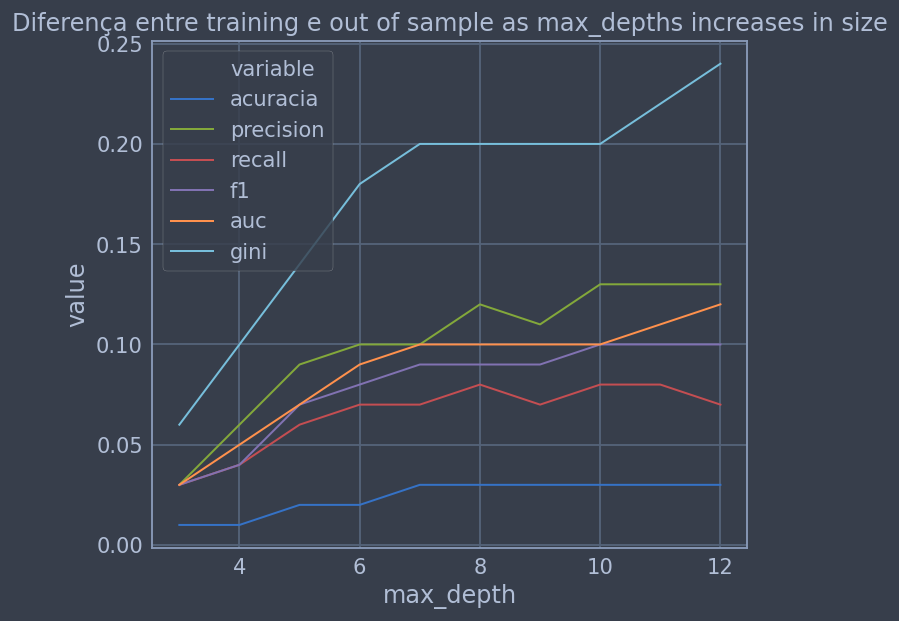

In [22]:
sns.lineplot(x = 'max_depth', 
             y = 'value', 
             hue = 'variable', 
             data = over)
plt.title('Diferença entre training e out of sample as max_depths increases in size')
plt.show()

In [23]:
popin = ma.popin.scores
oos = ma.oos.scores

In [24]:
popin

,acuracia,precision,recall,f1,auc,gini
0,0.85,0.79,0.43,0.56,0.89,0.78


In [25]:
baseparams = ma.model.get_params()

In [26]:
baseparams

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [27]:
oos

,acuracia,precision,recall,f1,auc,gini
0,0.82,0.66,0.36,0.46,0.77,0.54


# Optuna

In [28]:
X = ma.X

In [29]:
y = ma.y

In [30]:
# split    
from sklearn.model_selection import train_test_split
def split(df, target_var:str, test_size:float=0.3):

    X = df.drop(target_var, axis = 1)
    y = df[target_var]
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = test_size,
                                                        random_state = 42)
    return X_train, X_test, y_train, y_test

In [48]:
X_train, X_test, y_train, y_test = split(df = df,
                                         target_var = 'target')
# model fit
model = lgbm.LGBMClassifier(objective="binary", silent = True)
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="average_precision",
    early_stopping_rounds=100,
    verbose = False
)
# probabilities
y_train_probs = model.predict_proba(X_train)[:,1]
y_test_probs = model.predict_proba(X_test)[:,1]
y_test_pred = np.where(y_test_probs > 0.5 ,1 ,0)

def recall(y_real, model_pred):
        return np.round(recall_score(y_real, model_pred),2)
    
recall = recall(y_real = y_test, model_pred = y_test_pred)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [54]:
import optuna  # pip install optuna
from optuna.integration import LightGBMPruningCallback
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm
from sklearn.metrics import roc_curve, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve, average_precision_score

def objective(trial, df):
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [100]),
        "learning_rate": trial.suggest_float("learning_rate", 0.15, 0.20, step = 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 5, 40, step=5),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 50, 700, step=20),
        "max_bin": trial.suggest_int("max_bin", 100, 400),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }
    
    # split
    X_train, X_test, y_train, y_test = split(df = df,
                                             target_var = 'target')
    
    # model fit
    model = lgbm.LGBMClassifier(objective="binary", silent = True, **param_grid)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        eval_metric="average_precision",
        early_stopping_rounds=100,
        callbacks=[
            LightGBMPruningCallback(trial, "average_precision")
        ],  # Add a pruning callback
        verbose = False
    )
    
    # probabilities
    y_train_probs = model.predict_proba(X_train)[:,1]
    y_test_pred = np.where(y_test_probs > 0.5 ,1 ,0)

    def recall(y_real, model_pred):
        return np.round(recall_score(y_real, model_pred),2)
    
    recall = recall(y_real = y_test, model_pred = y_test_pred)

    # Metrics
#     def auc(y_real, model_probs):
#         '''AUC'''
#         return np.round(roc_auc_score(y_real, model_probs),2)
    
#     def precision(y_real, model_probs):
#         return np.round(precision_score(y_real, model_probs),2)

#     def f1(y_real, model_probs):
#         return np.round(f1_score(y_real, model_probs),2)
    
#     train_auc = auc(y_real = y_train, model_probs = y_train_probs)
#     test_auc = auc(y_real = y_test, model_probs = y_test_probs)
#     precision = pricision(y_real = y_test, model_probs = y_test_probs)
#     f1_score = f1(y_real = y_test, model_probs = y_test_probs)

    #cv_scores[idx] = preds

    return recall

In [55]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, df)

[I 2021-10-03 14:10:33,388] A new study created in memory with name: LGBM Classifier


In [56]:
study.optimize(func, n_trials=20)

[I 2021-10-03 14:10:33,850] Trial 0 finished with value: 0.36 and parameters: {'n_estimators': 100, 'learning_rate': 0.15, 'num_leaves': 15, 'max_depth': 10, 'min_data_in_leaf': 570, 'max_bin': 323, 'lambda_l1': 75, 'lambda_l2': 50, 'min_gain_to_split': 1.1792354148805229, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 0.36.


[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=1.1792354148805229, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1792354148805229
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=570, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=570
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[LightGBM] [Warning] bagging_fraction i

[I 2021-10-03 14:10:34,109] Trial 1 finished with value: 0.36 and parameters: {'n_estimators': 100, 'learning_rate': 0.15, 'num_leaves': 10, 'max_depth': 4, 'min_data_in_leaf': 430, 'max_bin': 274, 'lambda_l1': 45, 'lambda_l2': 45, 'min_gain_to_split': 14.69202908355041, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 0 with value: 0.36.


[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=6.663044209059054, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.663044209059054
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-10-03 14:10:34,463] Trial 2 finished with value: 0.36 and parameters: {'n_estimators': 100, 'learning_rate': 0.15, 'num_leaves': 35, 'max_depth': 12, 'min_data_in_leaf': 250, 'max_bin': 393, 'lambda_l1': 80, 'lambda_l2': 45, 'min_gain_to_split': 6.663044209059054, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 0 with value: 0.36.


[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will be ignored. Current value: lambda_l1=95
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=6.542736424941933, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.542736424941933
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=310, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=310
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-10-03 14:10:34,980] Trial 3 finished with value: 0.36 and parameters: {'n_estimators': 100, 'learning_rate': 0.15, 'num_leaves': 5, 'max_depth': 9, 'min_data_in_leaf': 310, 'max_bin': 131, 'lambda_l1': 95, 'lambda_l2': 90, 'min_gain_to_split': 6.542736424941933, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 0 with value: 0.36.


[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=12.328624797753722, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.328624797753722
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=490, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=490
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-10-03 14:10:35,400] Trial 4 finished with value: 0.36 and parameters: {'n_estimators': 100, 'learning_rate': 0.15, 'num_leaves': 40, 'max_depth': 7, 'min_data_in_leaf': 490, 'max_bin': 394, 'lambda_l1': 35, 'lambda_l2': 70, 'min_gain_to_split': 12.328624797753722, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 0 with value: 0.36.
[I 2021-10-03 14:10:35,476] Trial 5 pruned. Trial was pruned at iteration 0.
[I 2021-10-03 14:10:35,557] Trial 6 pruned. Trial was pruned at iteration 1.


[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=0.05712359564666425, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05712359564666425
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=130, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=130
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-10-03 14:10:35,674] Trial 7 pruned. Trial was pruned at iteration 1.
[I 2021-10-03 14:10:35,780] Trial 8 pruned. Trial was pruned at iteration 1.
[I 2021-10-03 14:10:35,849] Trial 9 pruned. Trial was pruned at iteration 1.
[I 2021-10-03 14:10:35,934] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2021-10-03 14:10:36,011] Trial 11 pruned. Trial was pruned at iteration 0.
[I 2021-10-03 14:10:36,092] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2021-10-03 14:10:36,175] Trial 13 pruned. Trial was pruned at iteration 1.
[I 2021-10-03 14:10:36,269] Trial 14 pruned. Trial was pruned at iteration 0.
[I 2021-10-03 14:10:36,364] Trial 15 pruned. Trial was pruned at iteration 1.
[I 2021-10-03 14:10:36,505] Trial 16 pruned. Trial was pruned at iteration 12.
[I 2021-10-03 14:10:36,586] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2021-10-03 14:10:36,669] Trial 18 pruned. Trial was pruned at iteration 1.
[I 2021-10-03 14:10:36,744] Trial 19 pruned. Trial was pruned at i

In [65]:
clf = lgb.LGBMClassifier()
bestparams = study.best_params
clf.set_params(**bestparams)

LGBMClassifier(bagging_fraction=0.6000000000000001, bagging_freq=1,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.8, importance_type='split', lambda_l1=75,
               lambda_l2=50, learning_rate=0.15, max_bin=323, max_depth=10,
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=570, min_gain_to_split=1.1792354148805229,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=15,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [67]:
ma = Pipe(df = df, model = clf, target_var = 'target')
ma.popin.scores
ma.oos.scores
ma.overfitting

[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=1.1792354148805229, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1792354148805229
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=570, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=570
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


,acuracia,precision,recall,f1,auc,gini
0,0.82,0.69,0.31,0.43,0.78,0.56


,acuracia,precision,recall,f1,auc,gini
0,0.81,0.68,0.3,0.42,0.76,0.52


,acuracia,precision,recall,f1,auc,gini
0,0.01,0.01,0.01,0.01,0.02,0.04
